<p style="background-color: white; color: black; font-family: Cambria; font-size: 2em; text-align: center; border-radius: 30px; box-shadow: 0 4px 8px lightsteelblue; padding: 25px;  border: 1px solid black;">
Kaggle. HR Analysis Case Study.
</p>

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
confusion_matrix, recall_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<p style="background-color: white; color: black; font-family: Georgia; font-size: 2em; text-align: left; border-radius: 10px; padding: 10px; box-shadow: 0 4px 8px lightsteelblue; margin: 20px 0; margin-right: 70%; border: 1px solid black;">
1. Loading the data
</p>

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Let's analyze the data using the classic functions .info() and .describe()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
# Check the data for null values
data.isnull().sum().sum()

6533

Based on the data from *data.info()*, null values are only if columns **previous_year_rating** и **education**.   
For the previous year's rating, this may mean that the employee did not work for this company last year. It is possible to make a fair statement that it is advisable to give an employee a raise for the current merits of the employee and his current level. There is quite enough such data in our dataset - **avg_training_score**, **awards_won?**, **KPIs_met >80%**. 
Thus, we can ignore old data and delete this metric from the dataset:

In [6]:
data = data.drop(['previous_year_rating'], axis=1)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,2,0,0,73,0


For the **education** metric, we should fill in the empty data with some value. To do this, let's see what values are already available in this field:

In [7]:
data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

So, we have a master's degree, a bachelor's degree, as well as an indicator that most likely means incomplete secondary education (college). We can assume that nan is a school level of education, because it is unlikely (although theoretically possible) that people without a school education will work in a company.  
Thus, fill in the empty values with the indicator **'High school'**:

In [8]:
data['education'] = data['education'].fillna('High school')

In [9]:
data['education'].unique()

array(["Master's & above", "Bachelor's", 'High school', 'Below Secondary'],
      dtype=object)

Our target metric for determining whether an employee has received a promotion is **is_promoted**.   
It should contain only True and False data - 1 and 0, respectively:

In [10]:
data['is_promoted'].unique()

array([0, 1], dtype=int64)

Based on the visual analysis of the data, most of the dataset metrics are quite obvious (they will be described below). However, there are some metrics that require more detailed study to understand the nature of their origin:
- **recruitment_channel**
- **no_of_trainings**
- **length_of_service**
- **avg_training_score**

Let's analyze this data in more detail:

**Recruitment channel:**

Unique data for recruitment_channel: ['sourcing' 'other' 'referred']


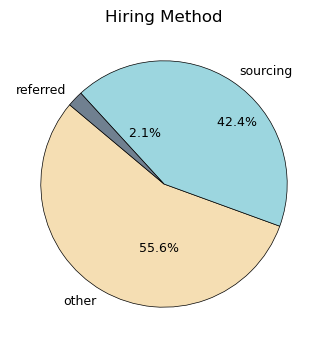

In [201]:
# Print all unique values
print(f"Unique data for recruitment_channel: {data['recruitment_channel'].unique()}")


palette = ["#f5deb3", "#9CD6DF", "#708090"]
# And let's look at their distribution
plt.figure(figsize=(5, 4))
plt.pie(data['recruitment_channel'].value_counts(), 
        labels=data['recruitment_channel'].value_counts().index, 
        autopct='%20.1f%%',
        colors=palette,
        startangle=140,
        textprops={'fontsize': 9, 'color': "black"},
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'})

# Adding title and labels
plt.title('Hiring Method')

plt.show()

Thus, we see that the **recruitment_channel** metric reflects the method of hiring the corresponding employee.

**no_of_trainings**:

Unique data of no_of_trainings: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


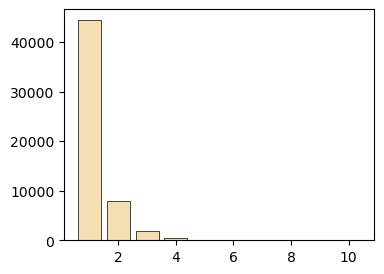

In [145]:
print(f"Unique data of no_of_trainings: {sorted(data['no_of_trainings'].unique())}")

plt.figure(figsize=(4,3))
plt.bar(sorted(data['no_of_trainings'].unique()), 
        data['no_of_trainings'].value_counts().sort_index(),
        color='wheat',
        linewidth = 0.5,
        edgecolor = 'black')
plt.show();

We can assume that this is the number of trainings completed by the employee. So, the most popular caes is the number of trainings == 1. It means that almost all the employees pass 1 test, but some of them have changed the job, for the further training we have much less employees.

**length_of_service:**

Unique data of length_of_service: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37]


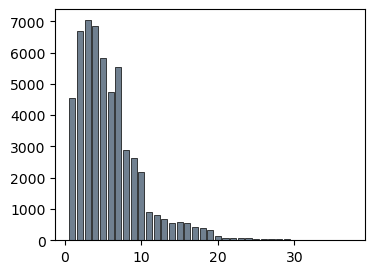

In [154]:
print(f"Unique data of length_of_service: {sorted(data['length_of_service'].unique())}")

plt.figure(figsize=(4,3))
plt.bar(sorted(data['length_of_service'].unique()), 
        data['length_of_service'].value_counts().sort_index(),
        color='slategrey',
        linewidth = 0.5,
        edgecolor = 'black')
plt.show();

From the name, it can be assumed that this indicator reflects the number of years worked in the company. The distribution of data also partially confirms this hypothesis - most of the employees work from 0 to 10 years, while an extremely small part of them work for 20 years or more.  
It also looks like **Gaussian distribution**, which is expected in some sence.

**avg_training_score.**  
Also let's look at the distribution of promoted employees by department:

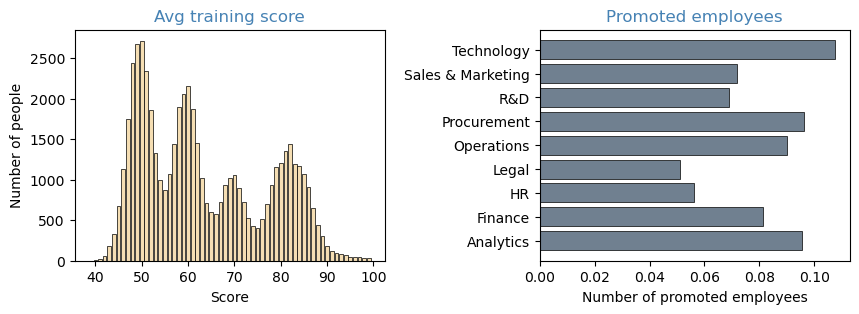

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
plt.subplots_adjust(wspace=0.5)
ax[0].bar(sorted(data['avg_training_score'].unique()),
        data['avg_training_score'].value_counts().sort_index(),
        color='wheat',
        linewidth = 0.5,
        edgecolor = 'black')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Number of people')
ax[0].set_title('Avg training score', color='steelblue')

promoted_by_department = data[data['is_promoted'] == 1].groupby('department').count().iloc[:,0]
total_employees = data.groupby('department').count().iloc[:,0]

ax[1].barh(promoted_by_department.index, 
           promoted_by_department / total_employees,
           color='slategrey',
           linewidth = 0.5,
           edgecolor = 'black')
ax[1].set_xlabel('Number of promoted employees')
ax[1].set_title('Promoted employees', color='steelblue')

plt.show();

Apparently, this **avg_training_score** means the number of points received as a result of the "training" - it implies some kind of testing of employees' knowledge, presumably conducted after the training campaign. Judging by the different number of trainings completed, this field implies either an average score for the last training conducted, or an average score for all the trainings completed.

Now let's look at some correlations.   
Difference in **tests score**, **Years of service**, and **Education**  of promoted and non-promoted employees:

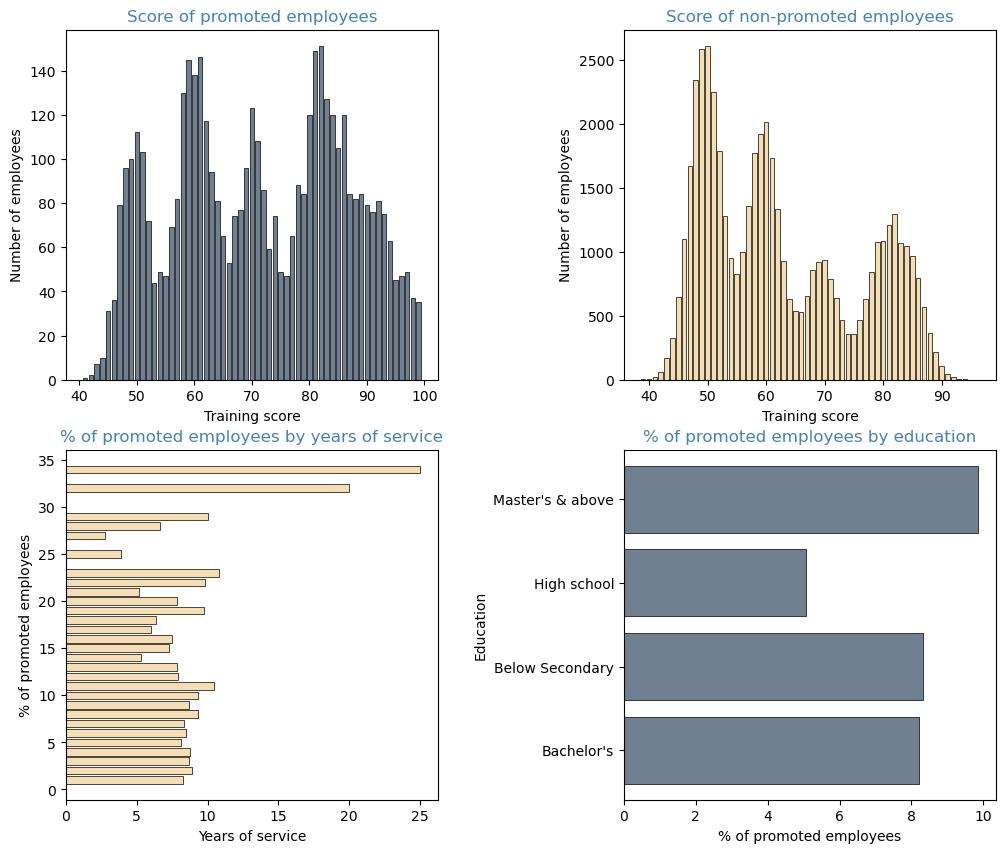

In [15]:
fix, ax = plt.subplots(2, 2, figsize=(12,10))
plt.subplots_adjust(wspace=0.5)

prom_training = data[data['is_promoted'] == 1].groupby('avg_training_score').count().iloc[:,0]
nonprom_training = data[data['is_promoted'] == 0].groupby('avg_training_score').count().iloc[:,0]

# Plotting a horizontal bar chart
ax[0,0].bar(prom_training.index, 
          prom_training,
          color='slategrey',
          linewidth = 0.5,
          edgecolor = 'black')
ax[0,0].set_ylabel('Number of employees')
ax[0,0].set_xlabel('Training score')
ax[0,0].set_title('Score of promoted employees', color='steelblue')

ax[0,1].bar(nonprom_training.index, 
          nonprom_training,
          color='wheat',
          linewidth = 0.5,
          edgecolor = 'black')
ax[0,1].set_ylabel('Number of employees')
ax[0,1].set_xlabel('Training score')
ax[0,1].set_title('Score of non-promoted employees', color='steelblue')

total_by_year = data.groupby('length_of_service').count().iloc[:, 0]
prom_by_years = data[data['is_promoted'] == 1].groupby('length_of_service').count().iloc[:, 0]
percent_prom_by_year = prom_by_years / total_by_year * 100

# Plotting a horizontal bar chart
ax[1,0].barh(percent_prom_by_year.dropna().index, 
          percent_prom_by_year.dropna(),
          color='wheat',
          linewidth = 0.5,
          edgecolor = 'black')
ax[1,0].set_ylabel('% of promoted employees')
ax[1,0].set_xlabel('Years of service')
ax[1,0].set_title('% of promoted employees by years of service', color='steelblue')

total_by_kpi = data.groupby('education').count().iloc[:, 0]
prom_by_kpi = data[data['is_promoted'] == 1].groupby('education').count().iloc[:, 0]
percent_prom_by_kpi = prom_by_kpi / total_by_kpi * 100

ax[1,1].barh(percent_prom_by_kpi.index, 
          percent_prom_by_kpi,
          color='slategrey',
          linewidth = 0.5,
          edgecolor = 'black')
ax[1,1].set_ylabel('Education')
ax[1,1].set_xlabel('% of promoted employees')
ax[1,1].set_title('% of promoted employees by education', color='steelblue')

plt.show()

Let's also look at some boxplots of some numeric variables:

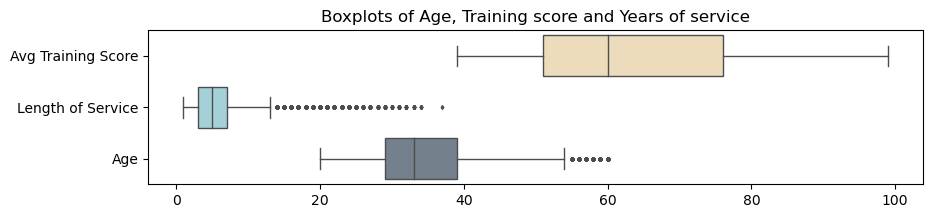

In [117]:
plt.figure(figsize=(10,2))
palette = ["#f5deb3", "#9CD6DF", "#708090"]
sns.boxplot(data=[data['avg_training_score'], 
                  data['length_of_service'], 
                  data['age']], 
                  orient='h',  
                  palette=palette,
                  fliersize=2,
                  linewidth=1,
                  whis=1.5)
plt.yticks([0, 1, 2], ['Avg Training Score', 'Length of Service', 'Age'])
plt.title('Boxplots of Age, Training score and Years of service')
plt.show()

**Thus, the semantic meanings of each column can be described as follows:**

- **employee_id** - unique employee ID
- **department** - the department in which the employee is registered
- **region** - the territorial place of work of the employee / branch in which the employee is registered
- **education** - employee's received education
- **gender** - gender of the employee
- **recruitment_channel** - the way the employee was hired
- **no_of_trainings** - number of completed trainings
- **age** - the age of the employee
- **previous_year_rating** - rating for the previous year
- **length_of_service** - number of years worked
- **KPIs_met >80%** - is the employee's KPI more than 80% - values True(1) / False(0)
- **awards_won?** - whether the employee has won any awards - values True(1) / False(0)
- **avg_training_score** - the average number of points received as a result of the training.
- **is_promoted** - whether the employee received a promotion - values True(1) / False(0). **This metric is the target metric of the dataset.**

<p style="background-color: white; color: black; font-family: Georgia; font-size: 2em; text-align: left; border-radius: 10px; padding: 10px; box-shadow: 0 4px 8px lightsteelblue; margin: 20px 0; margin-right: 70%; border: 1px solid black;">
2. Data preprocessing
</p>

**First of all, it is necessary to understand what data should be used to train our model.**

To do this, we will go from the opposite - exclude those data that will not be valuable for training the model, or will lead it to retraining. The following metrics should be excluded from the training sample:

- **employee_id** - the identifier does not carry any information
- **gender** - the gender of an employee is not the type of data on which to build a predictive analysis
- **recruitment_channel** - the way an employee was hired also has little effect on productivity and the decision to raise
- **age** - age, like gender, should not be a factor that plays a role

In [16]:
# We will make a copy of the data using the copy() function.
# Since we do not have nesting, there is no need to use deepcopy()
dataset = data.copy()

# Now we will delete the selected columns from the dataset
dataset = dataset.drop(['employee_id', 'gender', 'recruitment_channel', 'age'], axis=1)
dataset.head()

,department,region,education,no_of_trainings,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,1,8,1,0,49,0
1,Operations,region_22,Bachelor's,1,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,1,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,2,10,0,0,50,0
4,Technology,region_26,Bachelor's,1,2,0,0,73,0


One interesting feature is **Region**. We should explore it more explicitly:

In [17]:
dataset['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

To train the model, it is necessary to convert categorical data into numeric data.   
To do this, we can use *one-hot-encoding*, which converts values into columns with values 0 and 1.  
As we can see, three columns need to be converted: **department, region, education**. But since we see that we there are too much values of region, the number of features will increase too much if we one-hot this feature. It can lead to overfitting, so, we will drop this feature.

In [18]:
dataset = dataset.drop(['region'], axis=1)

In [19]:
dataset = pd.get_dummies(dataset, columns=['department', 'education'], dtype='int64')
dataset.head()

,no_of_trainings,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_High school,education_Master's & above
0,1,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,4,0,0,60,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1,7,0,0,50,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,2,10,0,0,50,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,1,2,0,0,73,0,0,0,0,0,0,0,0,0,1,1,0,0,0


Now it is necessary to divide the dataset into **train** and **test** samples. To do this, use the *train_test_split* function of the *Scikit-learn library*:

In [20]:
# It is necessary to separate the target metric from the total sample
x = dataset.drop('is_promoted', axis=1)
y = dataset['is_promoted']

# Then divide the dataset into a training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

<p style="background-color: white; color: black; font-family: Georgia; font-size: 2em; text-align: left; border-radius: 10px; padding: 10px; box-shadow: 0 4px 8px lightsteelblue; margin: 20px 0; margin-right: 70%; border: 1px solid black;">
3. Model design
</p>

This task is a classification task, since we need to predict the value of True or False.  
To do this, we can use simple logistic regression with classical metrics of classification models:
- Precision
- Recall
- Accuracy
- F1-score

In [21]:
# Use 'lbfgs' which applies regularization
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(x_train, y_train)

# Checking the accuracy of the model
logreg.score(x_test, y_test)

0.9284802043422733

Now let's analyze the result of our model.  
We use **Confusion matrix** to analyze FN, TN, FP, TP - false negative, true negative, false positive, true positive.
We also use **Precision** - a metric that displays the accuracy of the predictions obtained, i.e. the number of truly positive predictions to their total number, **Recall** - the percentage of positive predictions found from all objects of a positive class, **F1-score** is the average value between *Precision* and *Recall*.  

Let's write a function to analyze the received values of the model passed as a parameter:

In [22]:
def model_analyze(model):
    
    model.fit(x_train, y_train)
    print(f'Score: {model.score(x_test, y_test)}')
    
    y_pred = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1:", f1)
    print("Confusion Matrix:")
    
    # Drawing a plot
    plt.figure(figsize=(2,2))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    
    plt.show()


And to display the ROC-AUC graph:

In [23]:
def roc_auc_curve(model):
    
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]
    
    # Getting the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Drawing a plot
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.show()

And let's check several models:

### Logistic regression

Score: 0.9284802043422733
Precision: 0.8745387453874539
Recall: 0.24012158054711247
F1: 0.37678855325914146
Confusion Matrix:


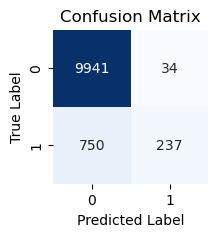

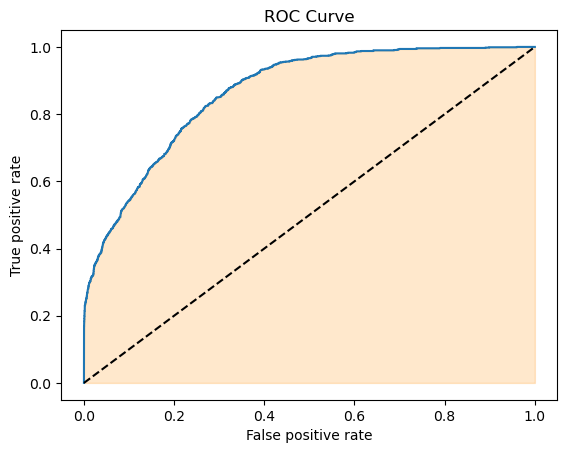

In [24]:
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

model_analyze(logreg)
roc_auc_curve(logreg)

###  Stochastic gradient descent

Score: 0.9110563765736179
Precision: 1.0
Recall: 0.0121580547112462
F1: 0.024024024024024027
Confusion Matrix:


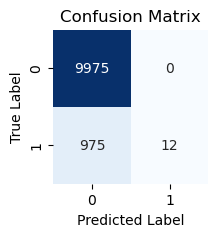

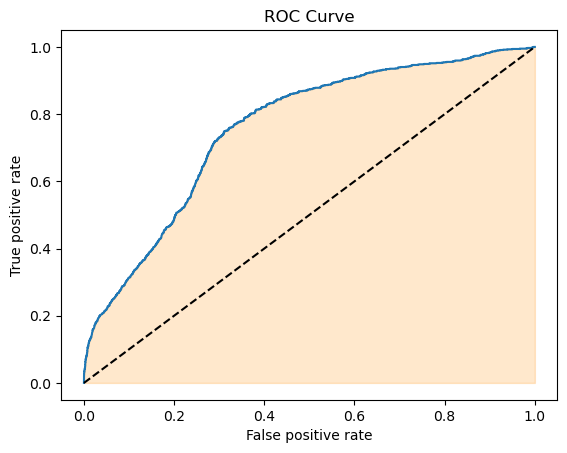

In [25]:
sgd = SGDClassifier(learning_rate='constant', eta0=0.01, loss='log_loss')

model_analyze(sgd)
roc_auc_curve(sgd)

### Gradient boosting

Score: 0.938058748403576
Precision: 0.9695121951219512
Recall: 0.3221884498480243
F1: 0.48365019011406846
Confusion Matrix:


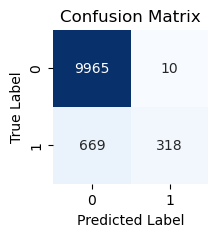

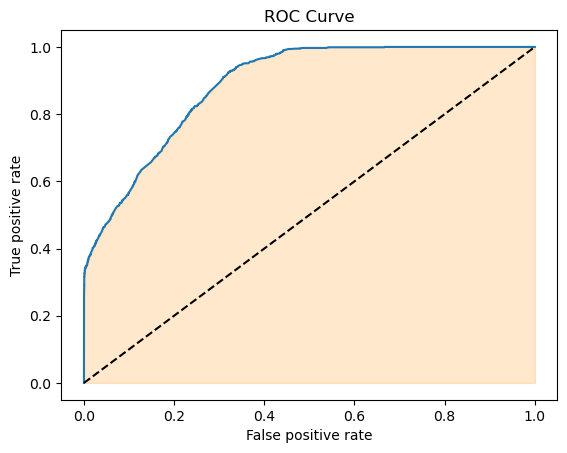

In [26]:
gbc = GradientBoostingClassifier(n_estimators=100)

model_analyze(gbc)
roc_auc_curve(gbc)

The most stable and with the highest performance at the moment is the gradient boosting algorithm.  
 You can increase the performance of the model by selecting parameters, or further transforming the dataset, for example, adding new metrics.

<p style="background-color: white; color: black; margin-left: 40%; margin-right: 40%; font-family: Cambria; font-size: 2em; text-align: center; border-radius: 0px; padding: 5px; border: 0px solid black;">
Created by:
</p>
<p style="background-color: white; color: black; font-family: Garamond; font-size: 2em; text-align: left; border-radius: 15px; padding: 25px; box-shadow: 0 4px 8px lightsteelblue; border: 1px solid black;">
Novotochin Artem
    <br>
    <br>
    <br>
Data scientist | Data engineer
</p>